In [167]:
import string

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [168]:
df_train = pd.read_csv('../input/nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('../input/nlp-getting-started/test.csv', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('\nTest Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB

Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.08 MB


In [169]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [170]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int16 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int8  
dtypes: int16(1), int8(1), object(3)
memory usage: 200.9+ KB


In [171]:
id_train=df_train['id']

id_test=df_test['id']

df_train.drop(columns='id',inplace=True)

df_test.drop(columns='id',inplace=True)

### **Duplicates processing**  

In [172]:
df_train.duplicated().sum()

52

In [173]:
duplicates = df_train[df_train.duplicated(keep=False)]
duplicates

,keyword,location,text,target
40,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
48,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,0
106,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
115,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vAM5POdGyw | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/zEVakJaPcz,0
118,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/THyzOMVWU0 | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/83jOO0xk29,0
...,...,...,...,...
6392,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,1
6434,suicide%20bombing,NaN,'Suicide bombing at [location named]...' #premonitions http://t.co/iIkSsJGBDn,1
6449,suicide%20bombing,NaN,'Suicide bombing at [location named]...' #premonitions http://t.co/iIkSsJGBDn,1
6652,terrorist,MAD as Hell,RT AbbsWinston: #Zionist #Terrorist kidnapped 15 #Palestinians in overnight terror on Palestinian Villages Û_ http://t.co/J5mKcbKcov,1


In [174]:
df_train = df_train.drop_duplicates()
df_train.duplicated().sum()

0

### **Statistical characteristics of data**

In [175]:
df_train.isna().sum()

keyword       61
location    2500
text           0
target         0
dtype: int64

In [176]:
df_test.isna().sum()

keyword       26
location    1105
text           0
dtype: int64

In [177]:
print('Percent of missing keyword in train data: {:.2f}%'.format(100 * df_train['keyword'].isna().mean()))
print('Percent of missing location in train data: {:.2f}%'.format(100 * df_train['location'].isna().mean()))
print('\nPercent of missing keyword in test data: {:.2f}%'.format(100 * df_test['keyword'].isna().mean()))
print('Percent of missing location in test data: {:.2f}%'.format(100 * df_test['location'].isna().mean()))

Percent of missing keyword in train data: 0.81%
Percent of missing location in train data: 33.06%

Percent of missing keyword in test data: 0.80%
Percent of missing location in test data: 33.86%


**We can conlcude, that missing values are distributed uniformly between df_train and df_test**

In [178]:
print('Number of unique keyword values in train data: {}'.format(df_train['keyword'].nunique()))
print('Number of unique location values in train data: {}'.format(df_train['location'].nunique()))
print('\nNumber of unique keyword values in test data: {}'.format(df_test['keyword'].nunique()))
print('Number of unique location values in test data: {}'.format(df_test['location'].nunique()))

Number of unique keyword values in train data: 221
Number of unique location values in train data: 3341

Number of unique keyword values in test data: 221
Number of unique location values in test data: 1602


In [179]:
print('Number of disasters: {}'.format(df_train['target'].sum()))
print('Number of non-disasters: {}'.format(df_train['target'].count() - df_train['target'].sum()))

Number of disasters: 3239
Number of non-disasters: 4322


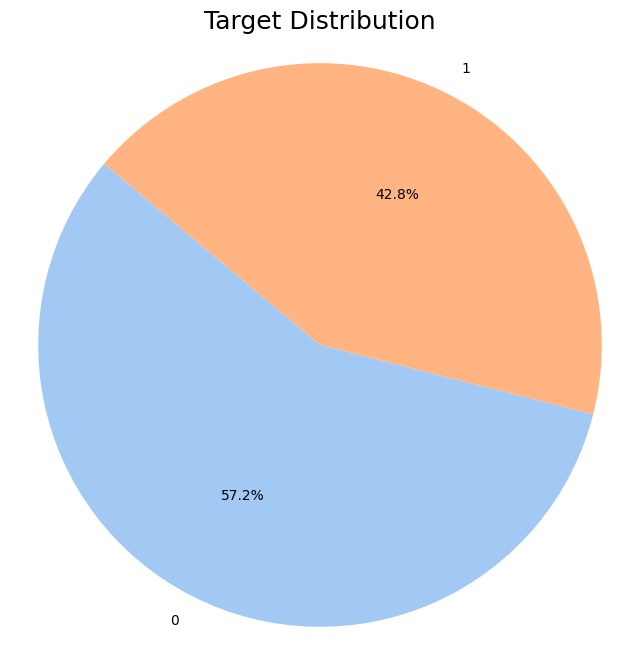

In [180]:
target_counts = df_train['target'].value_counts()

plt.figure(figsize=(8, 8), dpi=100)
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Target Distribution', fontsize=18)
plt.axis('equal')

plt.show()

In [184]:
keyword_counts = df_train['keyword'].value_counts()
keyword_counts

keyword
fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [185]:
keyword_counts = df_train['location'].value_counts()
keyword_counts

location
USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
                               ... 
Surulere Lagos,Home Of Swagg      1
MontrÌ©al, QuÌ©bec                1
Montreal                          1
ÌÏT: 6.4682,3.18287               1
Lincoln                           1
Name: count, Length: 3341, dtype: int64

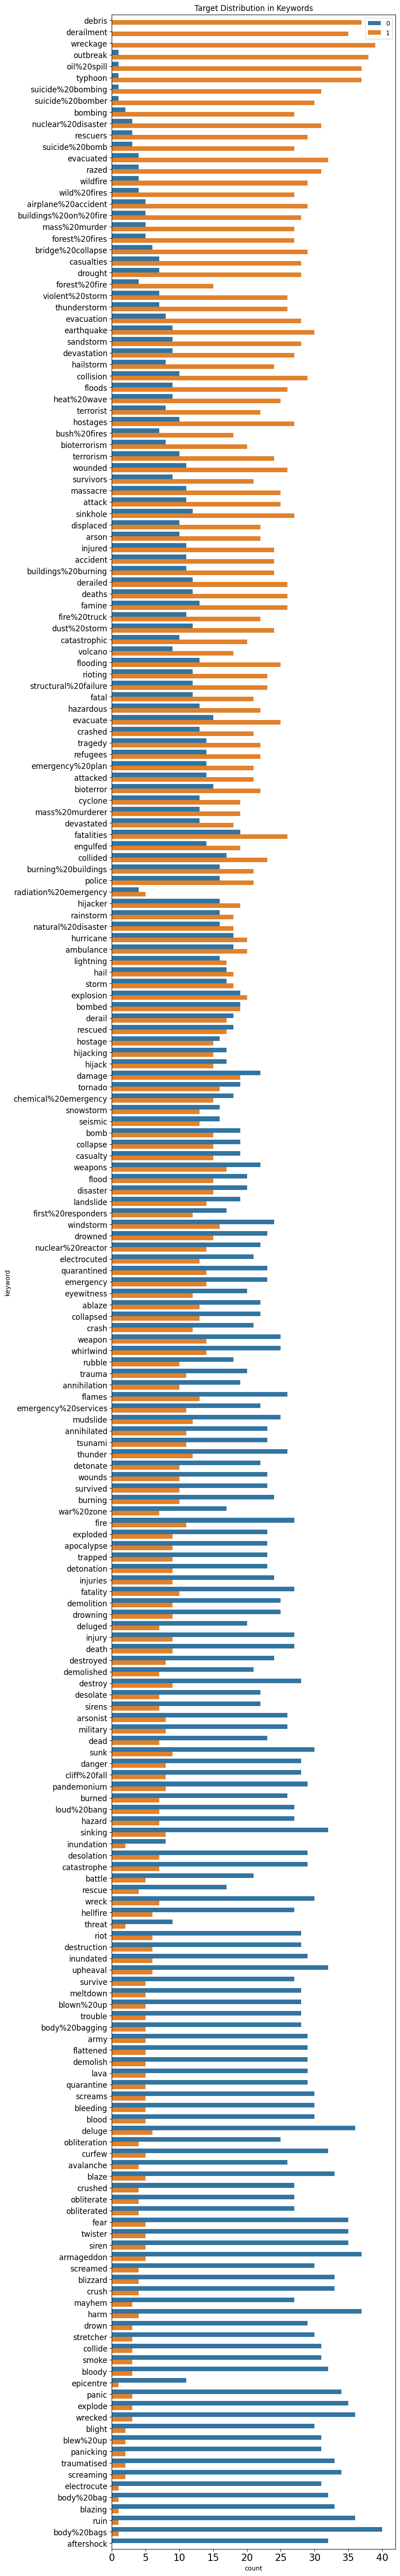

In [181]:
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

In [182]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

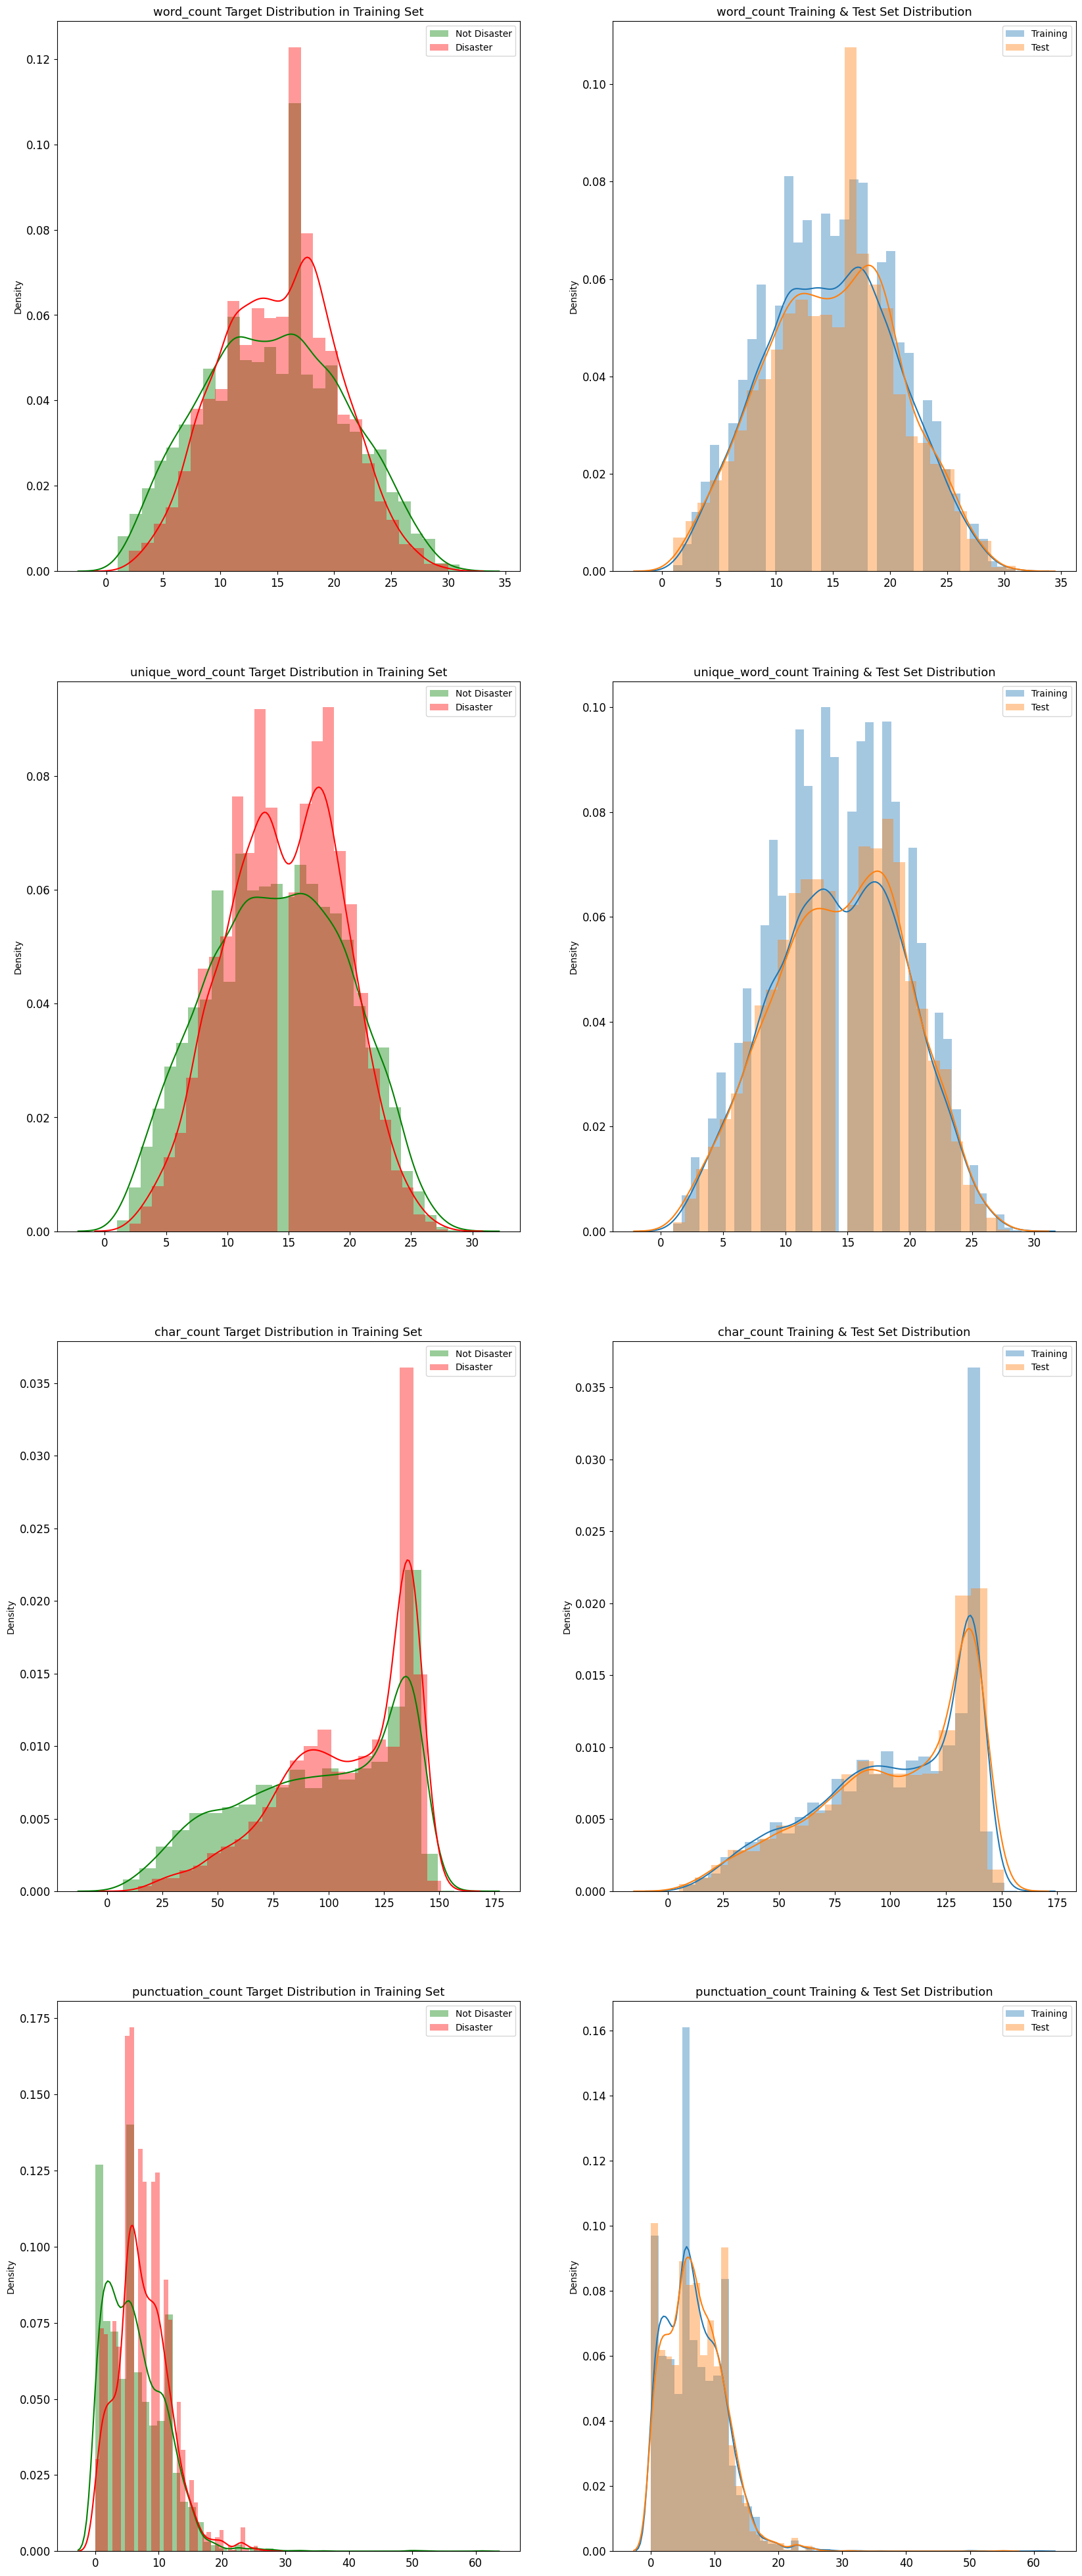

In [183]:
METAFEATURES = ['word_count', 'unique_word_count','char_count', 'punctuation_count']
DISASTER_TWEETS = df_train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(df_train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(df_train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(df_train[feature], label='Training', ax=axes[i][1])
    sns.distplot(df_test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()